In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


<span style ="color:blue; font-size: 16px; font-weight: bold;">Importing datasets:</span>

In [2]:
file = pd.read_csv(r'store_sales.csv', encoding='latin1')

file

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority
0,AG-2023-2040,1/1/2023,1/6/2023,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium
1,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium
2,HU-2023-1220,1/1/2023,1/5/2023,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High
3,IT-2023-3647632,1/1/2023,1/5/2023,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.0550,4.82,High
4,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,CA-2020-115427,12/31/2020,1/4/2021,Standard Class,Erica Bern,Corporate,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium
51286,MO-2020-2560,12/31/2020,1/5/2021,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium
51287,MX-2020-110527,12/31/2020,1/2/2021,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26,3,0.0,12.3600,0.35,Medium
51288,MX-2020-114783,12/31/2020,1/6/2021,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7,1,0.0,0.5600,0.20,Medium


In [3]:
returns=pd.read_excel(r'sales_returns.xlsx')
returns

,Returned,Order ID,Market
0,Yes,MX-2021-168137,LATAM
1,Yes,US-2023-165316,LATAM
2,Yes,ES-2021-1525878,EU
3,Yes,CA-2021-118311,United States
4,Yes,ES-2023-1276768,EU
...,...,...,...
1168,Yes,ES-2021-2639112,EU
1169,Yes,CA-2020-134194,United States
1170,Yes,ES-2022-3246286,EU
1171,Yes,ES-2022-4379168,EU


In [4]:
returns.isnull().sum()

Returned    0
Order ID    0
Market      0
dtype: int64

In [5]:
df = pd.merge(file, returns, left_on='order_id', right_on='Order ID', how='outer')
df


,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Returned,Order ID,Market
0,AG-2023-2040,1/1/2023,1/6/2023,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,NaN,NaN,NaN
1,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,NaN,NaN,NaN
2,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,NaN,NaN,NaN
3,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.3420,1.80,Medium,NaN,NaN,NaN
4,HU-2023-1220,1/1/2023,1/5/2023,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,CA-2020-115427,12/31/2020,1/4/2021,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,Yes,CA-2020-115427,United States
51291,UP-2020-4410,12/31/2020,1/4/2021,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,"Avery Round Labels, Alphabetical",28,4,0.0,6.1200,1.70,Medium,NaN,NaN,NaN
51292,MX-2020-108574,12/31/2020,1/4/2021,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,"Novimex Legal Exhibit Labels, Adjustable",17,3,0.0,0.6600,1.32,Medium,NaN,NaN,NaN
51293,MO-2020-2560,12/31/2020,1/5/2021,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,NaN,NaN,NaN


<span style ="color:Green; font-size: 16px; font-weight: bold;">Data cleaning :</span>

In [6]:
df.duplicated().sum()

0

There is no duplicates in the dataset

In [7]:
df.isnull().sum()

order_id              0
order_date            0
ship_date             0
ship_mode             0
customer_name         0
segment               0
state                 0
country               0
market                0
region                0
product_id            0
category              0
sub_category          0
product_name          0
sales                 0
quantity              0
discount              0
profit                0
shipping_cost         0
order_priority        0
Returned          48240
Order ID          48240
Market            48240
dtype: int64

In [8]:
#Renaming columns related to returns
df.rename(columns={'Order ID':'Returned_order_id'},inplace=True)
df.rename(columns={'Market':'Returned_market'},inplace=True)
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market
0,AG-2023-2040,1/1/2023,1/6/2023,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,NaN,NaN,NaN
1,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,NaN,NaN,NaN
2,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,NaN,NaN,NaN
3,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.342,1.80,Medium,NaN,NaN,NaN
4,HU-2023-1220,1/1/2023,1/5/2023,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,NaN,NaN,NaN


In [9]:
#replacing Nan in returned column with No

df['Returned'].fillna('No', inplace=True)

df['Returned_order_id'].fillna('Not returned',inplace=True)

df['Returned_market'].fillna('Not returned',inplace=True)

df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market
0,AG-2023-2040,1/1/2023,1/6/2023,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,"Tenex Lockers, Blue",408,2,0.0,106.1400,35.46,Medium,No,Not returned,Not returned
1,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Acme Trimmer, High Speed",120,3,0.1,36.0360,9.72,Medium,No,Not returned,Not returned
2,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.7700,4.70,Medium,No,Not returned,Not returned
3,IN-2023-47883,1/1/2023,1/8/2023,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,"Eaton Computer Printout Paper, 8.5 x 11",55,2,0.1,15.3420,1.80,Medium,No,Not returned,Not returned
4,HU-2023-1220,1/1/2023,1/5/2023,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,"Tenex Box, Single Width",66,4,0.0,29.6400,8.17,High,No,Not returned,Not returned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,CA-2020-115427,12/31/2020,1/4/2021,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",14,2,0.2,4.5188,0.89,Medium,Yes,CA-2020-115427,United States
51291,UP-2020-4410,12/31/2020,1/4/2021,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,"Avery Round Labels, Alphabetical",28,4,0.0,6.1200,1.70,Medium,No,Not returned,Not returned
51292,MX-2020-108574,12/31/2020,1/4/2021,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,"Novimex Legal Exhibit Labels, Adjustable",17,3,0.0,0.6600,1.32,Medium,No,Not returned,Not returned
51293,MO-2020-2560,12/31/2020,1/5/2021,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,"Wilson Jones Hole Reinforcements, Clear",4,1,0.0,0.4200,0.49,Medium,No,Not returned,Not returned


In [10]:
df.isnull().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales                0
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
Returned             0
Returned_order_id    0
Returned_market      0
dtype: int64



<span style ="color:Grey; font-size: 14px; font-weight: bold;">From the above DataFrame, we can able to see that the names of the markets in the 'returned_market' column differ from those in the 'market' . </span>


In [11]:
df['market'].unique()

array(['Africa', 'APAC', 'EMEA', 'EU', 'Canada', 'LATAM', 'US'],
      dtype=object)

In [12]:
pd.Series(df['Returned_market'].unique()).sort_values().values

array(['APAC', 'EU', 'LATAM', 'Not returned', 'United States'],
      dtype=object)

 <span style ="color:black; font-size: 14px;">Orders from markets in Africa, EMEA, and Canada have not been returned.</span>

In [13]:
#Standardizing the names of market, as US in market and United States in Returned_market

df['Returned_market'].replace('United States','US',inplace=True)

df_US= df[df['Returned_market'] == 'US']

df_US.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market
294,CA-2023-148614,1/21/2023,1/26/2023,Standard Class,Mark Van Huff,Consumer,California,United States,US,West,...,"Wirebound Service Call Books, 5 1/2"" x 4""",19,2,0.0,9.2928,0.94,Medium,Yes,CA-2023-148614,US
295,CA-2023-148614,1/21/2023,1/26/2023,Standard Class,Mark Van Huff,Consumer,California,United States,US,West,...,"Eldon Expressions Desk Accessory, Wood Pencil ...",19,2,0.0,5.7900,0.64,Medium,Yes,CA-2023-148614,US
797,CA-2023-103744,2/24/2023,2/28/2023,Standard Class,Michael Grace,Home Office,Texas,United States,US,Central,...,Staples,7,3,0.2,2.3409,0.50,Medium,Yes,CA-2023-103744,US
798,CA-2023-103744,2/24/2023,2/28/2023,Standard Class,Michael Grace,Home Office,Texas,United States,US,Central,...,GBC Plastic Binding Combs,4,3,0.8,-6.8634,0.23,Medium,Yes,CA-2023-103744,US
1123,US-2023-164763,3/17/2023,3/21/2023,Standard Class,Mark Haberlin,Corporate,Mississippi,United States,US,South,...,"GBC Twin Loop Wire Binding Elements, 9/16"" Spi...",30,2,0.0,14.9156,2.11,Medium,Yes,US-2023-164763,US


In [14]:
#shape gives dimesnion of dataframe

df.shape

(51295, 23)

In [15]:
#concise summary of dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           51295 non-null  object 
 1   order_date         51295 non-null  object 
 2   ship_date          51295 non-null  object 
 3   ship_mode          51295 non-null  object 
 4   customer_name      51295 non-null  object 
 5   segment            51295 non-null  object 
 6   state              51295 non-null  object 
 7   country            51295 non-null  object 
 8   market             51295 non-null  object 
 9   region             51295 non-null  object 
 10  product_id         51295 non-null  object 
 11  category           51295 non-null  object 
 12  sub_category       51295 non-null  object 
 13  product_name       51295 non-null  object 
 14  sales              51295 non-null  object 
 15  quantity           51295 non-null  int64  
 16  discount           512

<span style ="color:blue; font-size: 16px; font-weight: bold;">Changing datatypes :</span>

In the dataset, the 'Order Date' and 'Ship Date' are currently stored as object data types,change them to datetime. Additionally, the 'Sales' column, currently in object data type, should be converted to int.

In [16]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['ship_date'] = pd.to_datetime(df['ship_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           51295 non-null  object        
 1   order_date         51295 non-null  datetime64[ns]
 2   ship_date          51295 non-null  datetime64[ns]
 3   ship_mode          51295 non-null  object        
 4   customer_name      51295 non-null  object        
 5   segment            51295 non-null  object        
 6   state              51295 non-null  object        
 7   country            51295 non-null  object        
 8   market             51295 non-null  object        
 9   region             51295 non-null  object        
 10  product_id         51295 non-null  object        
 11  category           51295 non-null  object        
 12  sub_category       51295 non-null  object        
 13  product_name       51295 non-null  object        
 14  sales 

AS we are getting error while converting sales into int. The reason behind is that we have comma between the numbers.So removing the comma and changing it into int.

In [17]:
# Remove commas from the 'sales' and then convert to integer
df['sales'] = df['sales'].str.replace(',', '')

In [18]:
df['sales'] = pd.to_numeric(df['sales'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51295 entries, 0 to 51294
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           51295 non-null  object        
 1   order_date         51295 non-null  datetime64[ns]
 2   ship_date          51295 non-null  datetime64[ns]
 3   ship_mode          51295 non-null  object        
 4   customer_name      51295 non-null  object        
 5   segment            51295 non-null  object        
 6   state              51295 non-null  object        
 7   country            51295 non-null  object        
 8   market             51295 non-null  object        
 9   region             51295 non-null  object        
 10  product_id         51295 non-null  object        
 11  category           51295 non-null  object        
 12  sub_category       51295 non-null  object        
 13  product_name       51295 non-null  object        
 14  sales 

In [19]:
df['Delivery_time(in days)']= abs(df['order_date'] - df['ship_date']).dt.days
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sales,quantity,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market,Delivery_time(in days)
0,AG-2023-2040,2023-01-01,2023-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,408,2,0.0,106.1400,35.46,Medium,No,Not returned,Not returned,5
1,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,120,3,0.1,36.0360,9.72,Medium,No,Not returned,Not returned,7
2,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,114,5,0.1,37.7700,4.70,Medium,No,Not returned,Not returned,7
3,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,55,2,0.1,15.3420,1.80,Medium,No,Not returned,Not returned,7
4,HU-2023-1220,2023-01-01,2023-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,66,4,0.0,29.6400,8.17,High,No,Not returned,Not returned,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,CA-2020-115427,2020-12-31,2021-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,14,2,0.2,4.5188,0.89,Medium,Yes,CA-2020-115427,US,4
51291,UP-2020-4410,2020-12-31,2021-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,28,4,0.0,6.1200,1.70,Medium,No,Not returned,Not returned,4
51292,MX-2020-108574,2020-12-31,2021-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,17,3,0.0,0.6600,1.32,Medium,No,Not returned,Not returned,4
51293,MO-2020-2560,2020-12-31,2021-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,4,1,0.0,0.4200,0.49,Medium,No,Not returned,Not returned,5


In [20]:
df['order_day_of_week'] = df['order_date'].dt.day_name()
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,quantity,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market,Delivery_time(in days),order_day_of_week
0,AG-2023-2040,2023-01-01,2023-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,2,0.0,106.1400,35.46,Medium,No,Not returned,Not returned,5,Sunday
1,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,3,0.1,36.0360,9.72,Medium,No,Not returned,Not returned,7,Sunday
2,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,5,0.1,37.7700,4.70,Medium,No,Not returned,Not returned,7,Sunday
3,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,2,0.1,15.3420,1.80,Medium,No,Not returned,Not returned,7,Sunday
4,HU-2023-1220,2023-01-01,2023-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,4,0.0,29.6400,8.17,High,No,Not returned,Not returned,4,Sunday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,CA-2020-115427,2020-12-31,2021-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,2,0.2,4.5188,0.89,Medium,Yes,CA-2020-115427,US,4,Thursday
51291,UP-2020-4410,2020-12-31,2021-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,4,0.0,6.1200,1.70,Medium,No,Not returned,Not returned,4,Thursday
51292,MX-2020-108574,2020-12-31,2021-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,3,0.0,0.6600,1.32,Medium,No,Not returned,Not returned,4,Thursday
51293,MO-2020-2560,2020-12-31,2021-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,1,0.0,0.4200,0.49,Medium,No,Not returned,Not returned,5,Thursday


In [21]:
def classify_weektype(x):
    if x in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

df['Weektype'] = df['order_day_of_week'].apply(classify_weektype)

df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,discount,profit,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market,Delivery_time(in days),order_day_of_week,Weektype
51290,CA-2020-115427,2020-12-31,2021-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,0.2,4.5188,0.89,Medium,Yes,CA-2020-115427,US,4,Thursday,Weekday
51291,UP-2020-4410,2020-12-31,2021-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,0.0,6.1200,1.70,Medium,No,Not returned,Not returned,4,Thursday,Weekday
51292,MX-2020-108574,2020-12-31,2021-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,0.0,0.6600,1.32,Medium,No,Not returned,Not returned,4,Thursday,Weekday
51293,MO-2020-2560,2020-12-31,2021-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,0.0,0.4200,0.49,Medium,No,Not returned,Not returned,5,Thursday,Weekday
51294,CA-2020-156720,2020-12-31,2021-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,0.2,-0.6048,0.17,Medium,No,Not returned,Not returned,4,Thursday,Weekday


In [22]:
df['repeat_customer'] = df.duplicated(subset=['customer_name'], keep=False)

In [23]:
df['year']= df['order_date'].dt.year
df

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,shipping_cost,order_priority,Returned,Returned_order_id,Returned_market,Delivery_time(in days),order_day_of_week,Weektype,repeat_customer,year
0,AG-2023-2040,2023-01-01,2023-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,35.46,Medium,No,Not returned,Not returned,5,Sunday,Weekend,True,2023
1,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,9.72,Medium,No,Not returned,Not returned,7,Sunday,Weekend,True,2023
2,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,4.70,Medium,No,Not returned,Not returned,7,Sunday,Weekend,True,2023
3,IN-2023-47883,2023-01-01,2023-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,1.80,Medium,No,Not returned,Not returned,7,Sunday,Weekend,True,2023
4,HU-2023-1220,2023-01-01,2023-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,8.17,High,No,Not returned,Not returned,4,Sunday,Weekend,True,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51290,CA-2020-115427,2020-12-31,2021-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,0.89,Medium,Yes,CA-2020-115427,US,4,Thursday,Weekday,True,2020
51291,UP-2020-4410,2020-12-31,2021-01-04,Standard Class,Guy Thornton,Consumer,Zaporizhzhya,Ukraine,EMEA,EMEA,...,1.70,Medium,No,Not returned,Not returned,4,Thursday,Weekday,True,2020
51292,MX-2020-108574,2020-12-31,2021-01-04,Standard Class,Julia Barnett,Home Office,Tamaulipas,Mexico,LATAM,North,...,1.32,Medium,No,Not returned,Not returned,4,Thursday,Weekday,True,2020
51293,MO-2020-2560,2020-12-31,2021-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,0.49,Medium,No,Not returned,Not returned,5,Thursday,Weekday,True,2020


In [24]:
# give statistical summary of numerical columns by default

df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,Delivery_time(in days),year
count,51295,51295,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000,51295.000000
mean,2021-10-21 15:36:18.949215232,2021-10-18 08:37:04.497514496,246.489190,3.476518,0.142905,28.640874,26.374345,11.138181,2021.222673
min,2020-01-01 00:00:00,2020-01-01 00:00:00,0.000000,1.000000,0.000000,-6599.978000,0.000000,0.000000,2020.000000
25%,2020-10-24 00:00:00,2020-10-25 00:00:00,31.000000,2.000000,0.000000,0.000000,2.610000,3.000000,2020.000000
50%,2021-09-06 00:00:00,2021-09-03 00:00:00,85.000000,3.000000,0.000000,9.240000,7.790000,4.000000,2021.000000
75%,2022-09-27 00:00:00,2022-09-24 00:00:00,251.000000,5.000000,0.200000,36.810000,24.450000,5.000000,2022.000000
max,2023-12-31 00:00:00,2023-12-31 00:00:00,22638.000000,14.000000,0.850000,8399.976000,933.570000,730.000000,2023.000000
std,NaN,NaN,487.546732,2.278712,0.212272,174.416711,57.294351,71.622781,1.098944


Here I also get summary of dates. The reason behind this is datetime/timestamp are stored as integers internally.

In [25]:
df.drop(['product_id'],axis=1,inplace=True)

<span style ="color:green; font-size: 16px; font-weight: bold;">Data analysis :</span>

In [26]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'Returned',
       'Returned_order_id', 'Returned_market', 'Delivery_time(in days)',
       'order_day_of_week', 'Weektype', 'repeat_customer', 'year'],
      dtype='object')

<span style ="color:green; font-size: 16px; font-weight: bold;">yearly monthwise sales :</span>

In [27]:
df['year_month'] = df['order_date'].dt.strftime('%Y-%m')

dt stands for "datetime". .dt accessor is a feature provided by pandas to work with datetime components conveniently. It is used to access attributes like year, month, day, hour, minute, second, etc., without needing to loop through each element individually.

strftime stands for "string format time". It's a method used in Python to format a datetime object into a string representation based on a specified format string.

In [28]:
year_month_sales= df.groupby('year_month')['sales'].sum().reset_index()
year_month_sales.head()

,year_month,sales
0,2020-01,241267
1,2020-02,184848
2,2020-03,263110
3,2020-04,242781
4,2020-05,288404


In [29]:
year_month_sales['year'] = pd.to_datetime(year_month_sales['year_month']).dt.year

## SALES YOY:

# total sales for each year
yearly_sales = year_month_sales.groupby('year')['sales'].sum()

# Calculate YoY growth for sales
yearly_sales_yoy = yearly_sales.pct_change() * 100

yearly_sales_yoy_rounded=yearly_sales_yoy.round(2)

##  -----------------------------------------------

## profit yoy
order_year = df['order_date'].dt.year

# Calculate total profit for each year
yearly_profit = df.groupby(order_year)['profit'].sum()

# Calculate YoY growth for profit
yearly_profit_yoy = yearly_profit.pct_change() * 100

yearly_profit_rounded=yearly_profit.round(2)
yearly_profit_yoy_rounded=yearly_profit_yoy.round(2)


yearly_profit_yoy_df = pd.DataFrame({'year': yearly_profit.index, 'sales': yearly_sales.values, 'sales_yoy':yearly_sales_yoy_rounded, 
                                     'profit': yearly_profit_rounded.values,'profit_yoy': yearly_profit_yoy_rounded.values})


yearly_profit_yoy_df.reset_index(drop=True, inplace=True)
yearly_profit_yoy_df

,year,sales,sales_yoy,profit,profit_yoy
0,2020,4300793,NaN,504264.79,NaN
1,2021,3405860,-20.81,408512.76,-18.99
2,2022,2677499,-21.39,307415.28,-24.75
3,2023,2259511,-15.61,248940.81,-19.02


pct.change() is a method in pandas DataFrame that computes the percentage change from the immediately previous row by default.

<span style ="color:teal; font-size: 16px; font-weight: bold;"> 

Throughout these years, there has been a continuous decline in sales and profit growth. </span>


In [30]:
year_discount=df.groupby('year')['discount'].sum().reset_index()
year_discount

,year,discount
0,2020,2512.638
1,2021,1935.522
2,2022,1548.774
3,2023,1333.394


In [31]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'Returned',
       'Returned_order_id', 'Returned_market', 'Delivery_time(in days)',
       'order_day_of_week', 'Weektype', 'repeat_customer', 'year',
       'year_month'],
      dtype='object')

In [32]:
df['Delivery_time(in days)'].mean()

11.13818110926991

In [33]:
df_grouped = df.groupby(['year', 'segment'])['Delivery_time(in days)'].mean().round(2).reset_index()
df_grouped

,year,segment,Delivery_time(in days)
0,2020,Consumer,3.94
1,2020,Corporate,3.99
2,2020,Home Office,3.96
3,2021,Consumer,14.97
4,2021,Corporate,14.14
5,2021,Home Office,8.83
6,2022,Consumer,13.68
7,2022,Corporate,16.99
8,2022,Home Office,11.61
9,2023,Consumer,15.88


In [34]:
df[df['Returned']=="Yes"].groupby('segment')['Returned'].count()

segment
Consumer       1584
Corporate       971
Home Office     500
Name: Returned, dtype: int64

In [35]:
df.groupby('year')['Delivery_time(in days)'].mean()

year
2020     3.958428
2021    13.601275
2022    14.312261
2023    17.486441
Name: Delivery_time(in days), dtype: float64

Return Percentage:

In [37]:
unique_returns = df['Returned_order_id'].nunique()
unique_returns

1173

In [38]:
total_unique_orders = df['order_id'].nunique()
total_unique_orders

25035

In [39]:
returns = df[df['Returned'] == 'Yes']

unique_returns = returns['Returned_order_id'].nunique()

total_unique_orders = df['order_id'].nunique()

return_percentage = (unique_returns / total_unique_orders) * 100

return_percentage = round(return_percentage, 2)
return_percentage


4.68

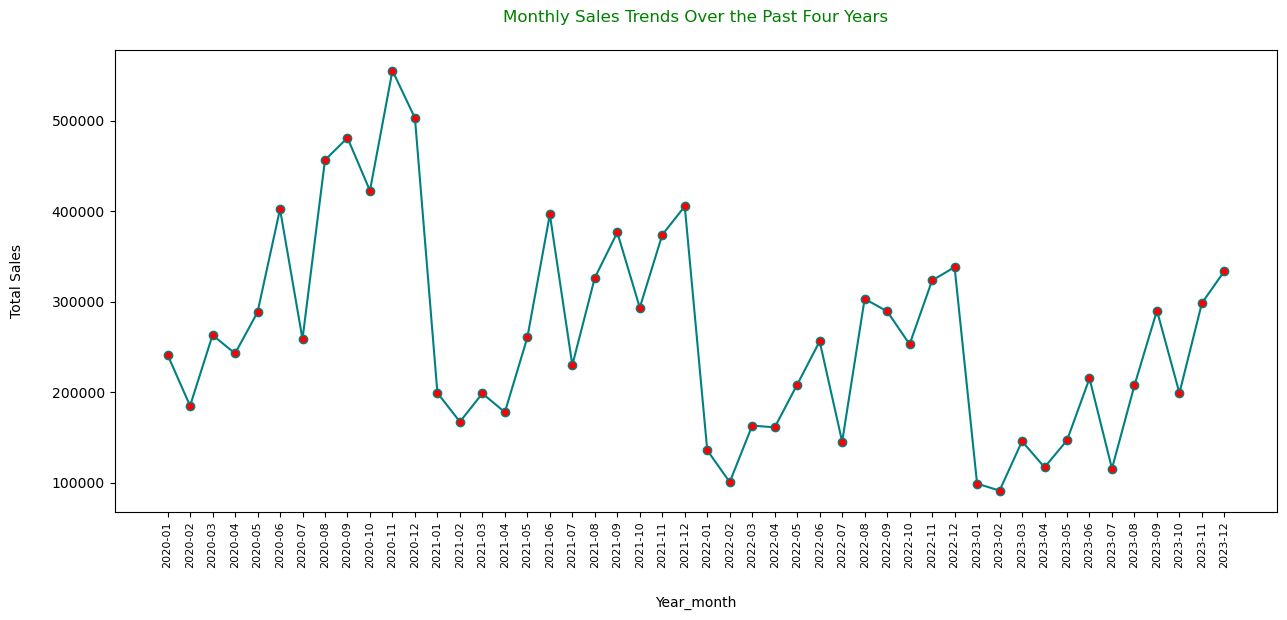

In [40]:
plt.figure(figsize=(15,6))
plt.plot(year_month_sales['year_month'],year_month_sales['sales'],color='Teal',marker='o',markerfacecolor='red')
plt.xticks(rotation='vertical',size=8)

plt.xlabel('Year_month',labelpad=20)
plt.ylabel('Total Sales',labelpad=20)
plt.title('Monthly Sales Trends Over the Past Four Years',pad=20,color='Green')

plt.show()

From the graph, it's evident that the initial two months of each year exhibit a decline in sales and a significant decline in the sales trend during the month of July.

<span style="color:blue;">Total sales distribution across regions :</span>

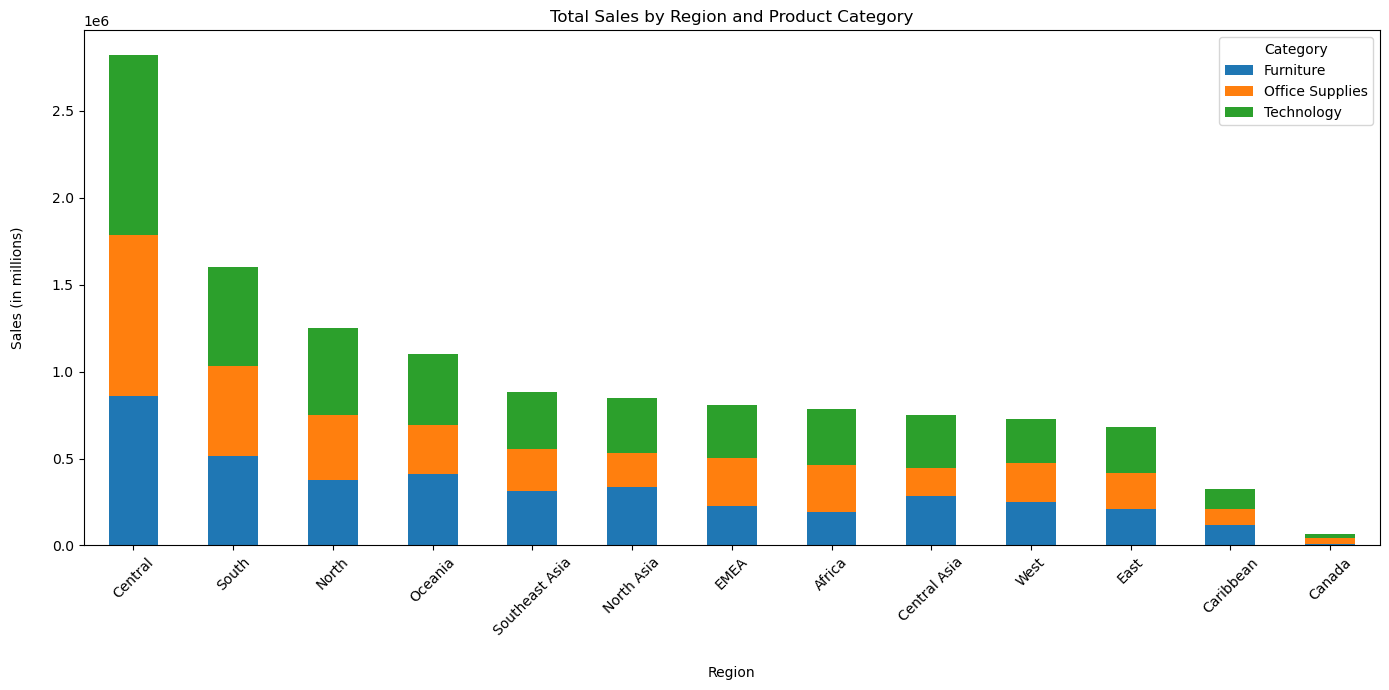

In [41]:
sales_summary = df.groupby(['region', 'category'])['sales'].sum().unstack().fillna(0)

# Calculate total sales for each region and sort regions in descending order
total_sales = sales_summary.sum(axis=1).sort_values(ascending=False)
sales_summary_sorted = sales_summary.loc[total_sales.index]

# Plotting
ax = sales_summary_sorted.plot(kind='bar', stacked=True, figsize=(14, 7))

plt.title('Total Sales by Region and Product Category')
plt.xlabel('Region',labelpad=20)
plt.ylabel('Sales (in millions)',labelpad=20)

plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
canada_sales=df[df['region']=='Canada'].groupby('sub_category')[['quantity','sales','profit']].sum().sort_values(by='profit',ascending=False)
canada_sales.head(50)

,quantity,sales,profit
sub_category,,,
Storage,118,10586,2912.43
Phones,46,10086,2679.87
Copiers,29,7467,2663.64
Appliances,30,7941,2233.98
Bookcases,32,5734,1342.53
Accessories,42,4472,1295.31
Art,129,4121,913.35
Chairs,24,3202,856.74
Binders,132,3091,786.18


Over the years, the Central region has been the primary contributor to the company's total sales, while Canada has consistently made the smallest contribution. Furthermore, the overall sales trend indicates a decline, signifying a decrease in sales over time

<span style ="color:red; font-size: 16px; font-weight: bold;">TOP SELLING PRODUCTS :</span>

In [43]:
result = df.groupby('product_name').agg({'sales': 'sum', 'category': 'first'}).reset_index().sort_values(by='sales', ascending=False).head(15)
result

,product_name,sales,category
310,"Apple Smart Phone, Full Size",86936,Technology
970,"Cisco Smart Phone, Full Size",76441,Technology
2415,"Motorola Smart Phone, Full Size",73159,Technology
2501,"Nokia Smart Phone, Full Size",71904,Technology
866,Canon imageCLASS 2200 Advanced Copier,61600,Technology
1837,"Hon Executive Leather Armchair, Adjustable",58200,Furniture
2631,"Office Star Executive Leather Armchair, Adjust...",50667,Furniture
1714,"Harbour Creations Executive Leather Armchair, ...",50120,Furniture
2988,"Samsung Smart Phone, Cordless",48654,Technology
2502,"Nokia Smart Phone, with Caller ID",47880,Technology


<span style ="color:blue; font-size: 14px; "> Top 10 most profitable products :</span>

C:\Users\Nirmal\AppData\Local\Temp\ipykernel_1212\3565985531.py:14: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


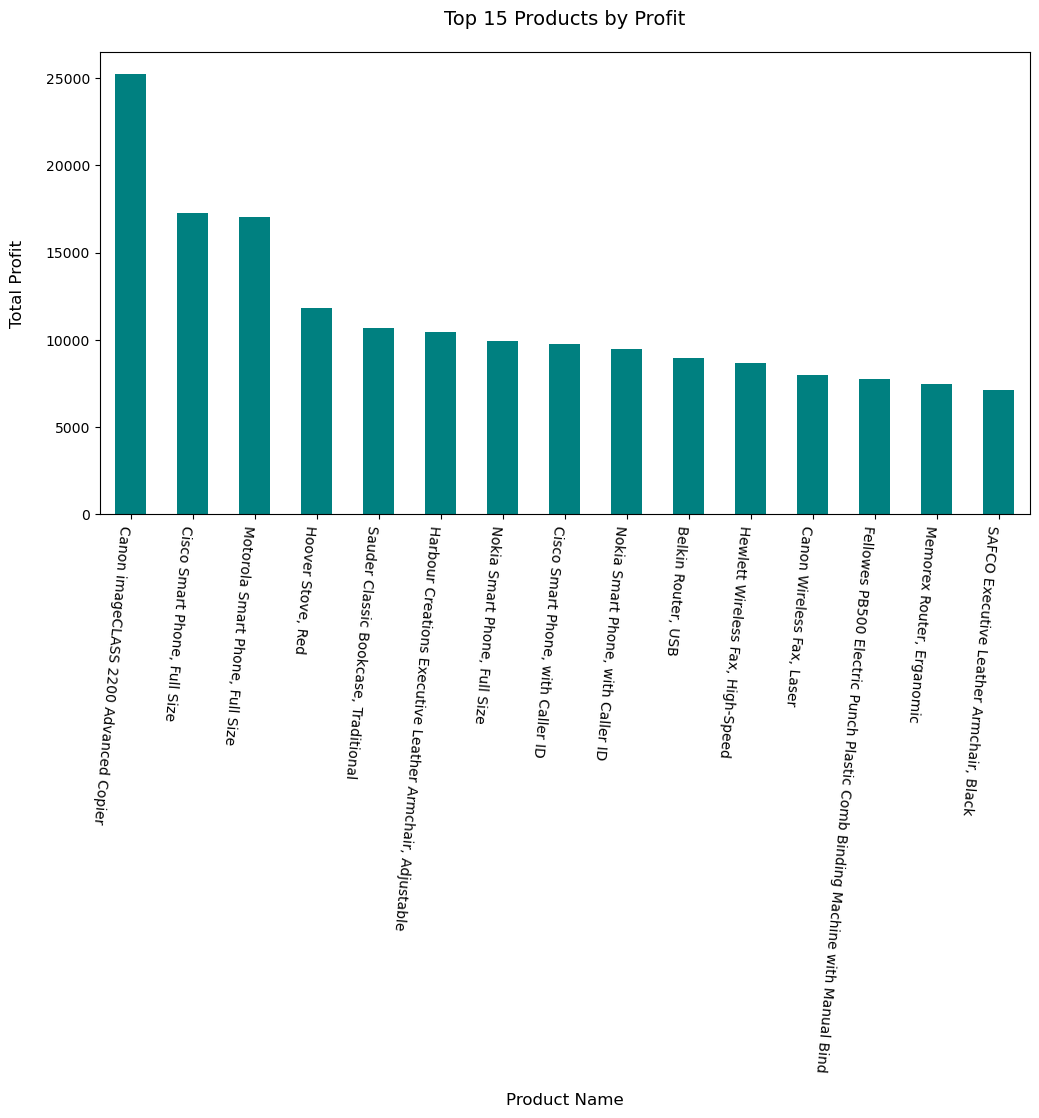

In [44]:
top15_products=df.groupby('product_name')['profit'].sum().sort_values(ascending=False).head(15)
                                                                                        

plt.figure(figsize=(12, 6))
top15_products.plot(kind='bar', color='teal')

# Set chart title and labels
plt.title('Top 15 Products by Profit', fontsize=14, pad=20)  # Adjust title padding
plt.xlabel('Product Name', fontsize=12, labelpad=15)  # Custom label for x-axis with labelpad
plt.ylabel('Total Profit', fontsize=12, labelpad=15)  # Custom label for y-axis with labelpad
plt.xticks(rotation=-95, ha='right')  # Rotate x-axis labels for better readability

# Show plot
plt.tight_layout()
plt.show()


The Nokia Smart Phone with Caller ID, identified by the product ID (TEC-PH-10004664), has shown substantial performance growth from 2021 to 2023, with increasing demand observed each year. Offering a reasonable discount on this product is expected to lead to a boost in both sales volume and revenue.

With 11 out of the top 15 bestselling products falling under the technology category, it's clear that there's significant consumer interest in these items. Offering discounts within this category is expected to drive sales and improve profitability.

<span style ="color:blue; font-size: 16px; font-weight: bold;"> Statewise sales</span>

In [45]:
#top 20 states with highest sales

df.groupby('state')[['sales']].sum().sort_values(by='sales',ascending=False).head(20)

,sales
state,
England,485166
California,457731
Ile-de-France,317818
New York,310914
New South Wales,270513
Queensland,238311
North Rhine-Westphalia,216458
Texas,170400
San Salvador,153648


<span style ="color:blue; font-size: 14px; font-weight: bold;"> SALES VS DISCOUNT</span>

In [46]:
correlation = df["discount"].corr(df["sales"])
correlation

-0.0867282245265028

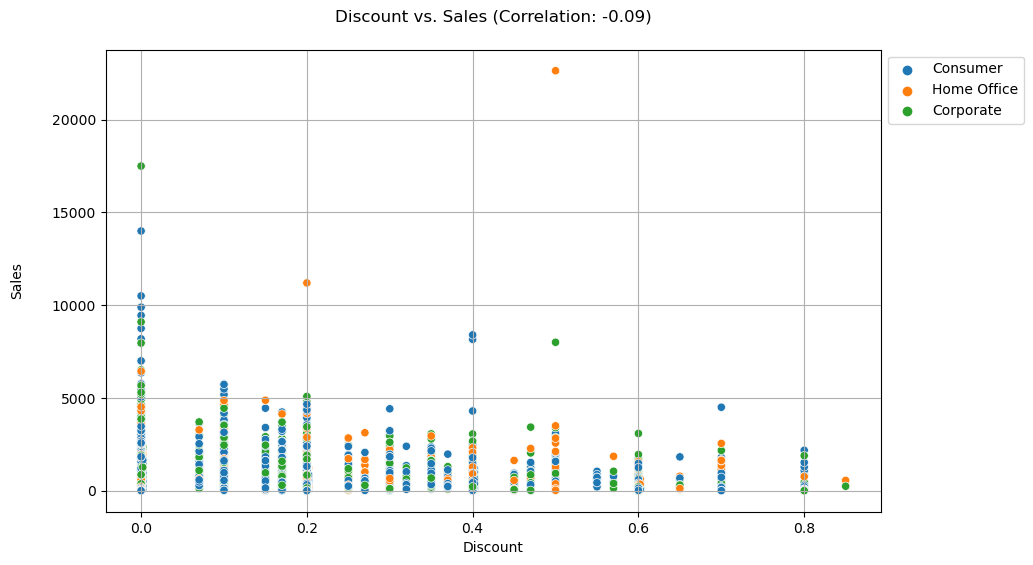

In [47]:
#using scatter plot to see any trend/correlation between discount and sales

plt.figure(figsize=(10, 6))
sns.scatterplot(x="discount", y="sales", data=df, hue="segment")
plt.title(f"Discount vs. Sales (Correlation: {correlation:.2f})",pad=20)
plt.xlabel("Discount")
plt.ylabel("Sales",labelpad=20)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.grid(True)
plt.show()

Based on the data,there is no significant influence of discounts on sales for the various sub-categories. The weak negative correlation suggests that changes in discounts do not strongly impact sales.From above,we can conclude that there is no direct influence of discount on sales.

In [48]:
correlation = df["discount"].corr(df["profit"])
correlation

-0.31637999418764934

<span style ="color:blue; font-size: 14px; font-weight: bold;">percentage contribution of each category to total profit :</span>

In [49]:
category_profit = df.groupby('category')['profit'].sum().reset_index().sort_values(by='profit',ascending=False)

total_profit = category_profit['profit'].sum()

# Calculate percentage contribution of each category to total sales
category_profit['Contribution_Percentage'] = (category_profit['profit'] / total_profit) * 100

print("Category-wise Profit:")
print(category_profit)
print("\nTotal Profit: ", total_profit) 

Category-wise Profit:
          category        profit  Contribution_Percentage
2       Technology  663892.64158                45.189398
1  Office Supplies  518481.41830                35.291644
0        Furniture  286759.58180                19.518958

Total Profit:  1469133.6416800001


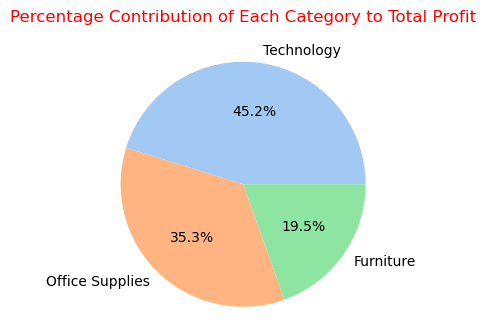

In [50]:
colors = sns.color_palette('pastel')

category_sales_sorted = category_profit.sort_values(by='Contribution_Percentage', ascending=False)

plt.figure(figsize=(6, 3.5))

plt.pie(category_sales_sorted['Contribution_Percentage'], labels=category_sales_sorted['category'], autopct='%1.1f%%',  colors=colors)

plt.title('Percentage Contribution of Each Category to Total Profit', pad=20, color='red')
plt.axis('equal')
plt.show()


<span style ="color:blue; font-size: 14px; font-weight: bold;">percentage contribution of each segment to total profit :</span>

In [51]:
#percentage contribution of each segment to total sales
segment_sales = df.groupby('segment')['sales'].sum().reset_index()

# Calculate total sales
total_sales = segment_sales['sales'].sum()

# Calculate percentage contribution of each category to total sales
segment_sales['Contribution_Percentage'] = (segment_sales['sales'] / total_sales) * 100

print("Segment-wise Sales:")
print(segment_sales)
print("\nTotal Sales: ", total_sales) 

Segment-wise Sales:
       segment    sales  Contribution_Percentage
0     Consumer  6508358                51.475257
1    Corporate  3824808                30.250790
2  Home Office  2310497                18.273953

Total Sales:  12643663


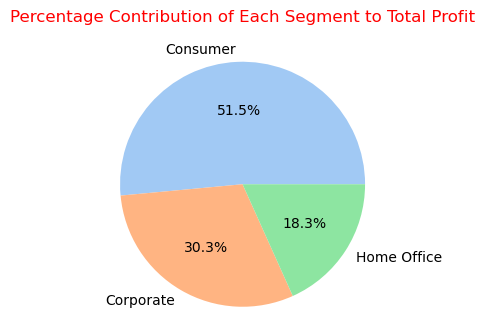

In [52]:
colors = sns.color_palette('pastel')

plt.figure(figsize=(6, 3.5))

plt.pie(segment_sales['Contribution_Percentage'], labels=segment_sales['segment'], autopct='%1.1f%%',  colors=colors)

plt.title('Percentage Contribution of Each Segment to Total Profit', pad=20, color='red')

plt.axis('equal')
plt.show()


In [53]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'Returned',
       'Returned_order_id', 'Returned_market', 'Delivery_time(in days)',
       'order_day_of_week', 'Weektype', 'repeat_customer', 'year',
       'year_month'],
      dtype='object')

In [54]:
purchase_freq = df.groupby('customer_name').size().sort_values(ascending=False)
purchase_freq

customer_name
Muhammed Yedwab    108
Steven Ward        106
Gary Hwang         102
Patrick O'Brill    102
Bill Eplett        102
                  ... 
Andy Reiter         35
David Bremer        34
Darren Budd         31
Nicole Brennan      31
Michael Oakman      29
Length: 795, dtype: int64

In [55]:
df['days_diff'] = df.groupby('customer_name')['order_date'].diff().abs().dt.days

# Calculate the number of unique orders and total orders for each customer
order_counts = df.groupby('customer_name').agg(
    unique_orders=('order_id', 'nunique'),
    total_orders=('order_id', 'count')
).reset_index()

# Calculate the average difference for each customer
average_days_diff = df.groupby('customer_name')['days_diff'].mean().reset_index(name='average_days_diff')

average_days_diff['average_days_diff'] = average_days_diff['average_days_diff'].round(2)

result = pd.merge(order_counts, average_days_diff, on='customer_name')

result = result.sort_values(by='unique_orders', ascending=False)
result

,customer_name,unique_orders,total_orders,average_days_diff
286,Frank Olsen,47,85,37.68
42,Anna Andreadi,47,91,46.27
530,Michael Paige,47,94,37.28
445,Kristen Hastings,46,88,36.99
451,Laura Armstrong,46,86,40.31
...,...,...,...,...
677,Sarah Bern,20,50,55.00
207,David Bremer,20,34,83.09
571,Nicole Brennan,17,31,61.53
529,Michael Oakman,17,29,90.18


Frank Olsen, Anna Andreadi, and Micheal Paige stand out as our most loyal customers, each placing 47 unique orders.

Muhammed Yedwab is one of our valued customers, having placed a total of 108 orders over the years.

In [56]:
mean_delivery_time = df.groupby('region')['Delivery_time(in days)'].mean()

# Define the custom rounding function
def custom_round(x):
    return np.ceil(x) if x - np.floor(x) >= 0.5 else np.floor(x)

mean_delivery_time_rounded = mean_delivery_time.apply(custom_round)

mean_delivery_time_rounded_sorted = mean_delivery_time_rounded.sort_values(ascending=False)

mean_delivery_time_rounded_sorted.astype(int)

region
Central           13
West              13
Central Asia      12
East              12
Africa            11
EMEA              11
South             11
Southeast Asia    11
North             10
Oceania           10
North Asia         8
Caribbean          7
Canada             4
Name: Delivery_time(in days), dtype: int32

In [57]:
df['Delivery_time(in days)'].mean()

11.13818110926991

<span style ="color:blue; font-size: 14px; font-weight: bold;">SHIPPING EDA:</span>

In [58]:
ship_mode_groupby = df.groupby('ship_mode')['sales'].count().sort_values(ascending=False)
total_sales = df['sales'].count()

# Calculate percentage contribution
percentage_contribution = (ship_mode_groupby / total_sales) * 100

# Create a DataFrame from ship_mode_groupby and percentage_contribution
result_df = pd.DataFrame({'Number of Sales': ship_mode_groupby, 'Percentage Contribution': percentage_contribution})

print(result_df)
print("\n")
print("Total sales :", total_sales)

                Number of Sales  Percentage Contribution
ship_mode                                               
Standard Class            30780                60.005849
Second Class              10309                20.097475
First Class                7505                14.631056
Same Day                   2701                 5.265620


Total sales : 51295


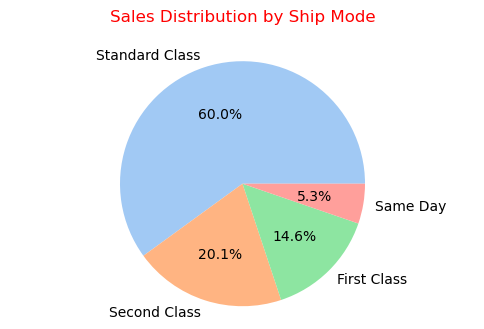

In [59]:
# Plotting
plt.figure(figsize=(6, 3.5))

plt.pie(result_df['Number of Sales'], labels=result_df.index, autopct='%1.1f%%',colors=colors)

plt.title('Sales Distribution by Ship Mode',pad=20,color='red')

plt.axis('equal')

# Show plot
plt.show()

<span style ="color:teal; font-size: 14px; font-weight: bold;"> 
Standard Class is the dominant shipping mode, contributing approximately 60% of the total sales. This suggests that customers prioritize affordability over speed in most cases.</span>

<Figure size 1000x600 with 0 Axes>

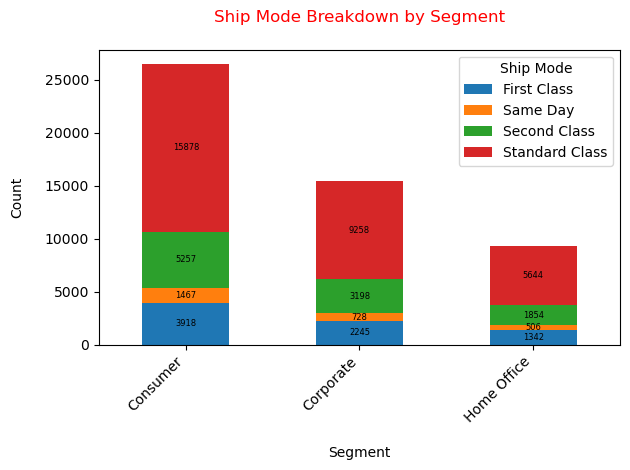

In [60]:
ship_mode_groupby = df.groupby(['segment', 'ship_mode'])['sales'].count()
ship_mode_groupby_df = ship_mode_groupby.unstack().fillna(0)

# Plotting
plt.figure(figsize=(10, 6))
ax = ship_mode_groupby_df.plot(kind='bar', stacked=True)

# Adding data labels
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=6, color='black')

plt.title('Ship Mode Breakdown by Segment', pad=20, color='red')
plt.xlabel('Segment', labelpad=15)
plt.ylabel('Count', labelpad=15)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Ship Mode')
plt.tight_layout()
plt.show()

<span style ="color:teal; font-size: 14px; font-weight: bold;"> 
In consumer segment,Higher proportion of Same Day compared to the other segments, suggesting a greater willingness to pay for faster delivery.While Standard Class dominates, there are variations in preferences between segments<br>

Recommedation:<br>
    1.Tailor promotions based on segment preferences. Highlight premium services for corporate clients and convenience for    home office users.<br>
    2.Educate customers about the benefits of different ship modes.<br>
    3.Gather feedback from each segment to continuously improve shipping services.</span>

<span style ="color:blue; font-size: 14px; font-weight: bold;">Returns:</span>

In [61]:
returns=df[df['Returned']=='Yes'].groupby('sub_category')['Returned'].count().sort_values(ascending=False)
print(returns)

total_returns=returns.sum()
print("Total returns :",total_returns)

sub_category
Binders        339
Storage        252
Paper          240
Chairs         224
Art            223
Accessories    220
Furnishings    202
Phones         199
Fasteners      177
Envelopes      146
Bookcases      146
Labels         145
Supplies       143
Copiers        135
Appliances     125
Machines        72
Tables          67
Name: Returned, dtype: int64
Total returns : 3055


<span style ="color:teal; font-size: 14px; font-weight: bold;"> 
Binders sub-category has the most highest returns takesn place.High return counts in certain categories might indicate potential issues with product quality, customer satisfaction, or fulfillment processes in those categories. This could warrant further investigation into the reasons behind the returns and strategies for improvement.<br>

Recommendation:<br>
    1.Strengthen quality control processes for high-return sub-categories.<br>
    2.Collect feedback from customers returning items. Identify common issues and address them.Use return data and feedback to  enhance product design, materials, and functionality.<br>

By understanding return patterns and addressing underlying issues, businesses can mitigate these costs and improve overall profitability.
 </span>

In [62]:
returns=df[df['Returned']=='Yes'].groupby('segment')['Returned'].count().sort_values(ascending=False)
print(returns)

total_returns=returns.sum()
print("Total returns :",total_returns)

segment
Consumer       1584
Corporate       971
Home Office     500
Name: Returned, dtype: int64
Total returns : 3055


In [63]:
df.groupby('segment')['Delivery_time(in days)'].mean().sort_values(ascending=False)


segment
Corporate      12.547346
Consumer       11.131750
Home Office     8.830088
Name: Delivery_time(in days), dtype: float64

The consumer segment has the highest return , which may be due to factors such as delivery time, poor product quality, or not meeting consumer expectations. Further analysis is required to determine the specific reasons, and gathering feedback on return reasons could help us improve return

In [64]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'category',
       'sub_category', 'product_name', 'sales', 'quantity', 'discount',
       'profit', 'shipping_cost', 'order_priority', 'Returned',
       'Returned_order_id', 'Returned_market', 'Delivery_time(in days)',
       'order_day_of_week', 'Weektype', 'repeat_customer', 'year',
       'year_month', 'days_diff'],
      dtype='object')

In [65]:
returned_order_count = df[df['Returned'] == 'Yes'].groupby('Returned_market').size().reset_index(name='returned_order_count')
returned_order_count


,Returned_market,returned_order_count
0,APAC,786
1,EU,637
2,LATAM,824
3,US,808
